In [1]:
# Download the API for the scraper so we can gather our information.
pip install basketball-reference-scraper==v1.0.1

In [2]:
from basketball_reference_scraper.teams import get_roster, get_team_stats, get_opp_stats, get_roster_stats, get_team_misc
import pandas as pd
import numpy as np

# We want to predict the position of a player by looking specifically at their in-game stats.
# These stats would be like 3P%, FG%, etc.
# The data ranges from 2014 to 2019.

years = list(range(2014, 2020))
print(years)


[2014, 2015, 2016, 2017, 2018, 2019]


In [3]:
link = 'https://en.wikipedia.org/wiki/Wikipedia:WikiProject_National_Basketball_Association/National_Basketball_Association_team_abbreviations'

team_table = pd.read_html(link, header = 0)
team_table = team_table[0]

team_table

,Abbreviation/Acronym,Franchise
0,ATL,Atlanta Hawks
1,BKN,Brooklyn Nets
2,BOS,Boston Celtics
3,CHA,Charlotte Hornets
4,CHI,Chicago Bulls
5,CLE,Cleveland Cavaliers
6,DAL,Dallas Mavericks
7,DEN,Denver Nuggets
8,DET,Detroit Pistons
9,GSW,Golden State Warriors


In [4]:
# Now we can just grab the team acronyms by making the column a series.
teams = list(team_table['Abbreviation/Acronym'])

print(teams)

['ATL', 'BKN', 'BOS', 'CHA', 'CHI', 'CLE', 'DAL', 'DEN', 'DET', 'GSW', 'HOU', 'IND', 'LAC', 'LAL', 'MEM', 'MIA', 'MIL', 'MIN', 'NOP', 'NYK', 'OKC', 'ORL', 'PHI', 'PHX', 'POR', 'SAC', 'SAS', 'TOR', 'UTA', 'WAS']


In [5]:
# Now we want to match each year with a team so that we can input it into the scraper.

matches = [ [a, b] for a in teams 
           for b in years if a != b]

print(matches)

[['ATL', 2014], ['ATL', 2015], ['ATL', 2016], ['ATL', 2017], ['ATL', 2018], ['ATL', 2019], ['BKN', 2014], ['BKN', 2015], ['BKN', 2016], ['BKN', 2017], ['BKN', 2018], ['BKN', 2019], ['BOS', 2014], ['BOS', 2015], ['BOS', 2016], ['BOS', 2017], ['BOS', 2018], ['BOS', 2019], ['CHA', 2014], ['CHA', 2015], ['CHA', 2016], ['CHA', 2017], ['CHA', 2018], ['CHA', 2019], ['CHI', 2014], ['CHI', 2015], ['CHI', 2016], ['CHI', 2017], ['CHI', 2018], ['CHI', 2019], ['CLE', 2014], ['CLE', 2015], ['CLE', 2016], ['CLE', 2017], ['CLE', 2018], ['CLE', 2019], ['DAL', 2014], ['DAL', 2015], ['DAL', 2016], ['DAL', 2017], ['DAL', 2018], ['DAL', 2019], ['DEN', 2014], ['DEN', 2015], ['DEN', 2016], ['DEN', 2017], ['DEN', 2018], ['DEN', 2019], ['DET', 2014], ['DET', 2015], ['DET', 2016], ['DET', 2017], ['DET', 2018], ['DET', 2019], ['GSW', 2014], ['GSW', 2015], ['GSW', 2016], ['GSW', 2017], ['GSW', 2018], ['GSW', 2019], ['HOU', 2014], ['HOU', 2015], ['HOU', 2016], ['HOU', 2017], ['HOU', 2018], ['HOU', 2019], ['IND', 2

In [6]:
# Now that we have the data that we'd like to input, we can now use the API to load in our data into a Pandas dataframe.

def get_info(team, year):
  try: 
    return get_roster_stats(team, year)
  except:
    return None

data = [get_info(i[0], i[1]) for i in matches]

data

[              PLAYER POS AGE TEAM   G  GS  ...  STL  BLK  TOV   PF   PTS   SEASON
 0        Pero AntiÄ‡   C  31  ATL  50  26  ...  0.4  0.2  1.1  2.5   7.0  2013-14
 1      Gustavo AyÃ³n   C  28  ATL  26  14  ...  1.0  0.4  1.1  1.8   4.3  2013-14
 2        Elton Brand   C  34  ATL  73  15  ...  0.5  1.2  0.8  2.6   5.7  2013-14
 3    DeMarre Carroll  SF  27  ATL  73  73  ...  1.5  0.3  1.1  2.6  11.1  2013-14
 4   Jared Cunningham  SG  22  ATL   5   0  ...  0.0  0.0  0.4  0.6   0.4  2013-14
 5         Al Horford   C  27  ATL  29  29  ...  0.9  1.5  2.2  1.9  18.6  2013-14
 6       John Jenkins  SG  22  ATL  13   0  ...  0.1  0.1  0.8  0.8   3.1  2013-14
 7        Kyle Korver  SG  32  ATL  71  71  ...  1.0  0.3  1.4  2.1  12.0  2013-14
 8       Shelvin Mack  PG  23  ATL  73  11  ...  0.7  0.0  1.2  1.4   7.5  2013-14
 9     Cartier Martin  SF  29  ATL  53   6  ...  0.5  0.1  0.6  1.3   5.9  2013-14
 10      Paul Millsap  PF  28  ATL  74  73  ...  1.7  1.1  2.5  2.8  17.9  2013-14
 11 

In [0]:
data = pd.concat(data)

In [8]:
# Awesome, now let's verify that we actually have all the teams. 
pd.value_counts(data['TEAM'])

PHI    136
MEM    134
NOP    132
CLE    129
MIL    123
HOU    121
DAL    118
LAL    116
LAC    116
ATL    115
SAC    114
NYK    114
WAS    112
MIN    111
CHI    111
UTA    110
OKC    110
DEN    110
MIA    110
BOS    109
DET    109
TOR    108
ORL    103
SAS    102
IND    101
GSW    100
POR     98
CHA     19
Name: TEAM, dtype: int64

In [9]:
# There is only a total of 28 teams, let's see what the differences are.

set(teams).difference(data['TEAM'])

{'BKN', 'PHX'}

In [10]:
# The documentation has BRK instead of BKN, and PHO instead of PHX

teams = ['BRK' if team == 'BKN' else team for team in teams]
teams = ['PHO' if team == 'PHX' else team for team in teams]

print(teams)

['ATL', 'BRK', 'BOS', 'CHA', 'CHI', 'CLE', 'DAL', 'DEN', 'DET', 'GSW', 'HOU', 'IND', 'LAC', 'LAL', 'MEM', 'MIA', 'MIL', 'MIN', 'NOP', 'NYK', 'OKC', 'ORL', 'PHI', 'PHO', 'POR', 'SAC', 'SAS', 'TOR', 'UTA', 'WAS']


In [0]:
# Now we can just rerun the above, and see if we have 30 teams.

matches = [ [a, b] for a in teams 
           for b in years if a != b]

data = [get_info(i[0], i[1]) for i in matches]
data = pd.concat(data)


In [12]:
# Awesome, we have all the teams now.
len(data['TEAM'].unique())

30

In [0]:
data.to_csv("data.csv", index = False)

In [14]:
# We can now extract the features that we can, as well as the value that we cant to predict (position).

data

,PLAYER,POS,AGE,TEAM,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,SEASON
0,Pero AntiÄ‡,C,31,ATL,50,26,18.5,2.5,5.9,.418,1.1,3.4,.327,1.3,2.5,.545,.514,1.0,1.3,.758,1.1,3.0,4.2,1.2,0.4,0.2,1.1,2.5,7.0,2013-14
1,Gustavo AyÃ³n,C,28,ATL,26,14,16.5,2.0,3.9,.510,0.0,0.0,NaN,2.0,3.9,.510,.510,0.3,0.8,.400,1.6,3.2,4.8,1.1,1.0,0.4,1.1,1.8,4.3,2013-14
2,Elton Brand,C,34,ATL,73,15,19.4,2.5,4.5,.539,0.0,0.0,.000,2.5,4.5,.542,.539,0.8,1.3,.649,1.3,3.6,4.9,1.0,0.5,1.2,0.8,2.6,5.7,2013-14
3,DeMarre Carroll,SF,27,ATL,73,73,32.1,4.1,8.8,.470,1.3,3.7,.362,2.8,5.1,.548,.546,1.5,1.9,.773,1.5,4.1,5.5,1.8,1.5,0.3,1.1,2.6,11.1,2013-14
4,Jared Cunningham,SG,22,ATL,5,0,4.4,0.2,0.4,.500,0.0,0.2,.000,0.2,0.2,1.000,.500,0.0,0.4,.000,0.0,0.2,0.2,0.6,0.0,0.0,0.4,0.6,0.4,2013-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,Devin Robinson,SF,23,WAS,7,0,13.6,2.7,4.6,.594,0.0,0.3,.000,2.7,4.3,.633,.594,1.3,2.0,.643,0.9,2.0,2.9,0.9,0.6,0.9,0.3,1.6,6.7,2018-19
21,TomÃ¡Å¡ SatoranskÃ½,PG,27,WAS,80,54,27.1,3.2,6.6,.485,0.8,2.0,.395,2.4,4.6,.524,.545,1.6,2.0,.819,1.0,2.5,3.5,5.0,1.0,0.2,1.5,2.2,8.9,2018-19
22,Jason Smith,C,32,WAS,12,1,10.8,1.3,3.1,.405,0.3,0.8,.400,0.9,2.3,.407,.459,0.8,1.0,.833,0.9,2.2,3.1,1.0,0.1,0.4,0.6,1.8,3.7,2018-19
23,John Wall,PG,28,WAS,32,32,34.5,7.7,17.3,.444,1.6,5.3,.302,6.1,12.0,.507,.490,3.8,5.5,.697,0.5,3.2,3.6,8.7,1.5,0.9,3.8,2.2,20.7,2018-19


In [15]:
# Unfortunately, with how scikit-learn works, any values with NaN (none types) cannot be used in the algorithm.
# Therefore, we'd have to drop them before we enter. 
data = data.dropna()

# It looks here like we lose a good amount of players. 
# Fortunately enough, most players with NaN are usually those that don't play enough minutes, or played at all.

data

,PLAYER,POS,AGE,TEAM,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,SEASON
0,Pero AntiÄ‡,C,31,ATL,50,26,18.5,2.5,5.9,.418,1.1,3.4,.327,1.3,2.5,.545,.514,1.0,1.3,.758,1.1,3.0,4.2,1.2,0.4,0.2,1.1,2.5,7.0,2013-14
2,Elton Brand,C,34,ATL,73,15,19.4,2.5,4.5,.539,0.0,0.0,.000,2.5,4.5,.542,.539,0.8,1.3,.649,1.3,3.6,4.9,1.0,0.5,1.2,0.8,2.6,5.7,2013-14
3,DeMarre Carroll,SF,27,ATL,73,73,32.1,4.1,8.8,.470,1.3,3.7,.362,2.8,5.1,.548,.546,1.5,1.9,.773,1.5,4.1,5.5,1.8,1.5,0.3,1.1,2.6,11.1,2013-14
4,Jared Cunningham,SG,22,ATL,5,0,4.4,0.2,0.4,.500,0.0,0.2,.000,0.2,0.2,1.000,.500,0.0,0.4,.000,0.0,0.2,0.2,0.6,0.0,0.0,0.4,0.6,0.4,2013-14
5,Al Horford,C,27,ATL,29,29,33.0,8.2,14.5,.567,0.1,0.4,.364,8.1,14.1,.572,.571,2.0,2.9,.682,2.3,6.1,8.4,2.6,0.9,1.5,2.2,1.9,18.6,2013-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,Austin Rivers,SG,26,WAS,29,2,23.6,2.6,6.7,.392,1.1,3.7,.311,1.5,3.0,.489,.477,0.9,1.6,.543,0.3,2.1,2.4,2.0,0.6,0.3,1.2,2.5,7.2,2018-19
20,Devin Robinson,SF,23,WAS,7,0,13.6,2.7,4.6,.594,0.0,0.3,.000,2.7,4.3,.633,.594,1.3,2.0,.643,0.9,2.0,2.9,0.9,0.6,0.9,0.3,1.6,6.7,2018-19
21,TomÃ¡Å¡ SatoranskÃ½,PG,27,WAS,80,54,27.1,3.2,6.6,.485,0.8,2.0,.395,2.4,4.6,.524,.545,1.6,2.0,.819,1.0,2.5,3.5,5.0,1.0,0.2,1.5,2.2,8.9,2018-19
22,Jason Smith,C,32,WAS,12,1,10.8,1.3,3.1,.405,0.3,0.8,.400,0.9,2.3,.407,.459,0.8,1.0,.833,0.9,2.2,3.1,1.0,0.1,0.4,0.6,1.8,3.7,2018-19


In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV

In [0]:
# We'll be using a Random Forest due to the high number of features present in our data. 
# Random forests have been proven to be one of the better models when dealing with multiple features.

# First, lets split the data into two sets: training and testing.
# A common ratio is 80% test, 20% train, so let's roll with that.

position = data['POS']
features = data[ ['MP', 'FG%', '3P%', '2P%', 'eFG%', 'FT%', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']   ]


train_features, test_features, train_class, test_class = train_test_split(features, position, test_size = 0.20)


In [18]:
# Now let's run an unoptimized random forest classifier.
rf = RandomForestClassifier()

rf.fit(train_features, train_class)
rf_result = rf.predict(test_features)
error_rf = accuracy_score(test_class, rf_result)

print(error_rf)

0.6508771929824562


In [0]:
# We can actually optimize an RF to see if we can grab better results with the classifier.

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}



In [20]:
rf_opt = RandomizedSearchCV(estimator = rf, 
                               param_distributions = random_grid, 
                               n_iter = 100, cv = 3, verbose=2, 
                               random_state=42, n_jobs = -1)

rf_opt.fit(train_features, train_class)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 18.5min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [0]:
params_rf = rf_opt.best_params_

In [22]:
opt_rf = RandomForestClassifier(**params_rf)
opt_rf.fit(train_features, train_class)
opt_rf_result = opt_rf.predict(test_features)

opt_rf_error = accuracy_score(test_class, opt_rf_result)
print(opt_rf_error)


# The optimizer did nothing. Compare the results to a basic LogisticRegression


0.6403508771929824


In [23]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression(max_iter = 100000)
lg.fit(train_features, train_class)
lg_results = lg.predict(test_features)

lg_error = accuracy_score(lg_results, test_class)
print(lg_error)


0.643859649122807


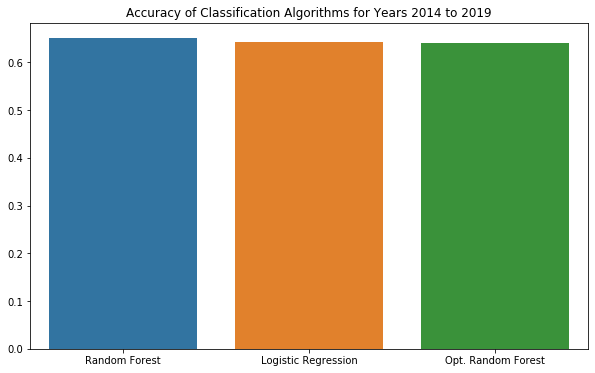

In [37]:
# With the error AFTER optimization for random forest having essentially 0 effect on the accuracy, it's honestly not worth
# it to optimize the logistic regression. It is computationally expensive in doing so. One thing to note is that the errors
# are very similar. Both have around a 66% success rate.

# Let's plot the error rates for easier viewing.
import seaborn as sns
import matplotlib.pyplot as plt

errors = {
    'Random Forest': error_rf,
    'Logistic Regression': lg_error,
    'Opt. Random Forest': opt_rf_error
}

errors = pd.DataFrame(errors, index = [0])

plt.figure(figsize = [10,6])
sns.barplot(data = errors)
plt.title('Accuracy of Classification Algorithms for Years 2014 to 2019')
plt.savefig('errors_14-19')

In [25]:
# With the error AFTER optimization for random forest having essentially 0 effect on the accuracy, it's honestly not worth
# it to optimize the logistic regression. It is computationally expensive in doing so. One thing to note is that the errors
# are very similar. Both have around a 66% success rate.

# Now that we're through with that, let get another era. Let's choose 2003-2008, another 5 year gap.
years_2 = list(range(2004,2010))
print(years_2)

[2004, 2005, 2006, 2007, 2008, 2009]


In [26]:
# We essentially can just do the same thing we did as above. Just have to make sure that the team codes line-up with the API.

# So now, we just replace the team codes that we used similar to how we did above.
# Things to note, Bobcats are in place of the Hornets, and the Hornets are in place of the Pelicans. 
# Also, the Nets are in New Jersey instead of Brooklyn.

teams = ['NJN' if team == 'BKN' else team for team in teams]
teams = ['PHO' if team == 'PHX' else team for team in teams]
teams = ['CHA' if team == 'CHO' else team for team in teams]

# We also have to add in the Supersonics, as this was around the time they fully transitioned into the OKC Thunder.

teams.append('SEA')

# When we run the algorithm to scrape BBALL-REF, we should have 31 teams. 


matches_2 = [ [a, b] for a in teams 
           for b in years_2 if a != b]

print(matches_2)

[['ATL', 2004], ['ATL', 2005], ['ATL', 2006], ['ATL', 2007], ['ATL', 2008], ['ATL', 2009], ['BRK', 2004], ['BRK', 2005], ['BRK', 2006], ['BRK', 2007], ['BRK', 2008], ['BRK', 2009], ['BOS', 2004], ['BOS', 2005], ['BOS', 2006], ['BOS', 2007], ['BOS', 2008], ['BOS', 2009], ['CHA', 2004], ['CHA', 2005], ['CHA', 2006], ['CHA', 2007], ['CHA', 2008], ['CHA', 2009], ['CHI', 2004], ['CHI', 2005], ['CHI', 2006], ['CHI', 2007], ['CHI', 2008], ['CHI', 2009], ['CLE', 2004], ['CLE', 2005], ['CLE', 2006], ['CLE', 2007], ['CLE', 2008], ['CLE', 2009], ['DAL', 2004], ['DAL', 2005], ['DAL', 2006], ['DAL', 2007], ['DAL', 2008], ['DAL', 2009], ['DEN', 2004], ['DEN', 2005], ['DEN', 2006], ['DEN', 2007], ['DEN', 2008], ['DEN', 2009], ['DET', 2004], ['DET', 2005], ['DET', 2006], ['DET', 2007], ['DET', 2008], ['DET', 2009], ['GSW', 2004], ['GSW', 2005], ['GSW', 2006], ['GSW', 2007], ['GSW', 2008], ['GSW', 2009], ['HOU', 2004], ['HOU', 2005], ['HOU', 2006], ['HOU', 2007], ['HOU', 2008], ['HOU', 2009], ['IND', 2

In [0]:
data2 = [get_info(i[0], i[1]) for i in matches_2]

In [28]:
data2 = pd.concat(data2)

data2

,PLAYER,POS,AGE,TEAM,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,SEASON
0,Shareef Abdur-Rahim,PF,27,ATL,53,53,36.9,7.2,14.9,.485,0.1,0.4,.217,7.1,14.5,.493,.488,5.5,6.3,.880,2.7,6.7,9.3,2.4,0.8,0.4,2.5,2.8,20.1,2003-04
1,Michael Bradley,C,24,ATL,11,1,5.5,0.5,1.1,.500,0.0,0.0,NaN,0.5,1.1,.500,.500,0.0,0.0,NaN,0.5,0.6,1.1,0.0,0.2,0.0,0.4,0.7,1.1,2003-04
2,Jason Collier,C,26,ATL,20,16,27.3,4.0,8.3,.479,0.1,0.2,.250,3.9,8.1,.484,.482,3.4,4.3,.788,1.8,3.8,5.6,0.9,0.6,0.6,1.6,3.6,11.3,2003-04
3,Chris Crawford,PF,28,ATL,56,25,21.6,3.8,8.4,.448,0.8,2.0,.389,3.0,6.4,.466,.495,1.8,2.1,.866,1.0,2.1,3.1,0.8,0.7,0.4,1.0,2.3,10.2,2003-04
4,Josh Davis,PF,23,ATL,4,1,5.8,0.5,1.3,.400,0.0,0.5,.000,0.5,0.8,.667,.400,0.3,0.3,1.000,0.3,1.0,1.3,0.0,0.0,0.0,0.5,0.8,1.3,2003-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16,Earl Watson,PG,28,SEA,78,73,29.1,4.3,9.6,.454,0.6,1.7,.371,3.7,7.9,.472,.487,1.4,1.9,.766,0.6,2.3,2.9,6.8,0.9,0.1,2.2,2.0,10.7,2007-08
17,Delonte West,PG,24,SEA,35,5,20.8,2.8,7.1,.388,0.5,1.6,.339,2.2,5.5,.402,.426,0.7,1.1,.667,0.4,2.4,2.7,3.2,0.9,0.3,1.9,1.3,6.8,2007-08
18,Chris Wilcox,PF,25,SEA,62,55,28.0,5.4,10.3,.524,0.0,0.0,.000,5.4,10.2,.526,.524,2.6,4.0,.645,2.0,5.0,7.0,1.2,0.7,0.6,1.7,2.8,13.4,2007-08
19,Damien Wilkins,SF,28,SEA,76,31,24.3,3.6,8.9,.403,0.7,2.0,.323,2.9,6.8,.427,.440,1.4,1.9,.736,0.9,2.3,3.2,2.0,0.8,0.3,1.2,1.7,9.2,2007-08


In [29]:
data2 = data2.dropna()

data2



,PLAYER,POS,AGE,TEAM,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,SEASON
0,Shareef Abdur-Rahim,PF,27,ATL,53,53,36.9,7.2,14.9,.485,0.1,0.4,.217,7.1,14.5,.493,.488,5.5,6.3,.880,2.7,6.7,9.3,2.4,0.8,0.4,2.5,2.8,20.1,2003-04
2,Jason Collier,C,26,ATL,20,16,27.3,4.0,8.3,.479,0.1,0.2,.250,3.9,8.1,.484,.482,3.4,4.3,.788,1.8,3.8,5.6,0.9,0.6,0.6,1.6,3.6,11.3,2003-04
3,Chris Crawford,PF,28,ATL,56,25,21.6,3.8,8.4,.448,0.8,2.0,.389,3.0,6.4,.466,.495,1.8,2.1,.866,1.0,2.1,3.1,0.8,0.7,0.4,1.0,2.3,10.2,2003-04
4,Josh Davis,PF,23,ATL,4,1,5.8,0.5,1.3,.400,0.0,0.5,.000,0.5,0.8,.667,.400,0.3,0.3,1.000,0.3,1.0,1.3,0.0,0.0,0.0,0.5,0.8,1.3,2003-04
5,Boris Diaw,SG,21,ATL,76,37,25.3,1.8,4.1,.447,0.1,0.3,.231,1.8,3.8,.467,.457,0.7,1.2,.602,1.5,3.0,4.5,2.4,0.8,0.5,1.7,2.5,4.5,2003-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16,Earl Watson,PG,28,SEA,78,73,29.1,4.3,9.6,.454,0.6,1.7,.371,3.7,7.9,.472,.487,1.4,1.9,.766,0.6,2.3,2.9,6.8,0.9,0.1,2.2,2.0,10.7,2007-08
17,Delonte West,PG,24,SEA,35,5,20.8,2.8,7.1,.388,0.5,1.6,.339,2.2,5.5,.402,.426,0.7,1.1,.667,0.4,2.4,2.7,3.2,0.9,0.3,1.9,1.3,6.8,2007-08
18,Chris Wilcox,PF,25,SEA,62,55,28.0,5.4,10.3,.524,0.0,0.0,.000,5.4,10.2,.526,.524,2.6,4.0,.645,2.0,5.0,7.0,1.2,0.7,0.6,1.7,2.8,13.4,2007-08
19,Damien Wilkins,SF,28,SEA,76,31,24.3,3.6,8.9,.403,0.7,2.0,.323,2.9,6.8,.427,.440,1.4,1.9,.736,0.9,2.3,3.2,2.0,0.8,0.3,1.2,1.7,9.2,2007-08


In [0]:
# We have about 2400 rows to play with give or take that did NOT have NaN values. 
# Now for the fun part, re-run the same algorithms and see how the results differ for the two eras. 
# Our guess is that this era would have a higher accuracy rate.

position = data2['POS']
features = data2[ ['MP', 'FG%', '3P%', '2P%', 'eFG%', 'FT%', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']   ]


train_features, test_features, train_class, test_class = train_test_split(features, position, test_size = 0.20)

In [31]:
rf = RandomForestClassifier()

rf.fit(train_features, train_class)
rf_result = rf.predict(test_features)
error_rf_2 = accuracy_score(test_class, rf_result)

print(error_rf_2)

# Wow, the error is more or less the same for the two different eras. Let's attempt to optimize it, and see if there are any changes.
# After, we can go back to a base logistic regression.

0.6013363028953229


In [32]:
rf_opt = RandomizedSearchCV(estimator = rf, 
                               param_distributions = random_grid, 
                               n_iter = 100, cv = 3, verbose=2, 
                               random_state=42, n_jobs = -1)

rf_opt.fit(train_features, train_class)

params_rf = rf_opt.best_params_

opt_rf = RandomForestClassifier(**params_rf)
opt_rf.fit(train_features, train_class)
opt_rf_result = opt_rf.predict(test_features)

opt_rf_error_2 = accuracy_score(test_class, opt_rf_result)
print(opt_rf_error_2)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.1min
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 15.5min finished


0.6124721603563474


In [33]:
# Again, go back to logistic regression.

lg = LogisticRegression(max_iter = 100000)
lg.fit(train_features, train_class)
lg_results = lg.predict(test_features)

lg_error_2 = accuracy_score(lg_results, test_class)
print(lg_error_2)

0.6636971046770601


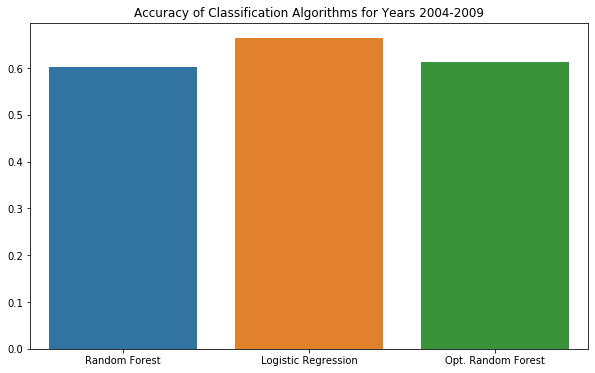

In [39]:
errors_2 = {
    'Random Forest': error_rf_2,
    'Logistic Regression': lg_error_2,
    'Opt. Random Forest': opt_rf_error_2
}

errors_2 = pd.DataFrame(errors_2, index = [0])

plt.figure(figsize = [10,6])
sns.barplot(data = errors_2)
plt.title('Accuracy of Classification Algorithms for Years 2004-2009')
plt.savefig('errors_04-09')

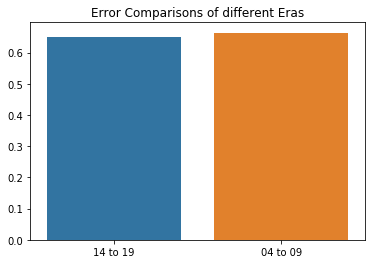

In [42]:
# Compare the highest performing algorithms for both.

compare = {
    '14 to 19': error_rf, 
    '04 to 09': lg_error_2
}

compare = pd.DataFrame(compare, index = [0])

sns.barplot(data = compare)
plt.xlabel('')
plt.ylabel('')
plt.title('Error Comparisons of different Eras')
plt.savefig('compare')